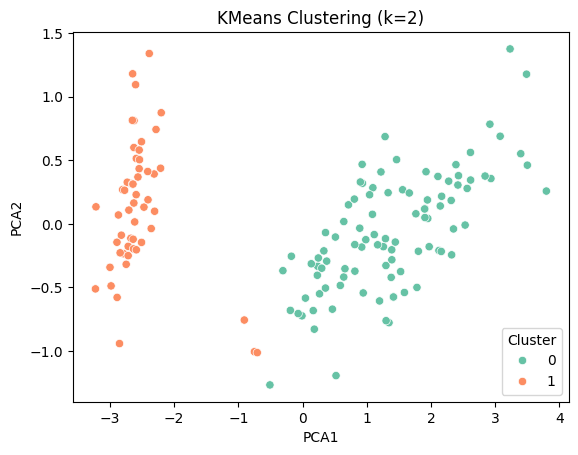


Cluster Characteristics:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.301031          2.886598           4.958763   
1                 5.005660          3.369811           1.560377   

         petal width (cm)      PCA1      PCA2  
Cluster                                        
0                1.695876  1.386401 -0.069804  
1                0.290566 -2.537375  0.127755  


In [1]:

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# A) Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# B) Silhouette analysis to find optimal k
range_k = range(2, 10)
scores = [silhouette_score(X, KMeans(n_clusters=k).fit_predict(X)) for k in range_k]
optimal_k = range_k[scores.index(max(scores))]

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k)
X['Cluster'] = kmeans.fit_predict(X)

# C) PCA for visualization
pca = PCA(n_components=2).fit_transform(X.drop('Cluster', axis=1))
X['PCA1'], X['PCA2'] = pca[:, 0], pca[:, 1]

# Plot clusters
sns.scatterplot(data=X, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.show()

# Analyze cluster characteristics
print("\nCluster Characteristics:")
print(X.groupby('Cluster').mean())